# 두번째. R을 이용한  조금 더 심화된 딥 러닝 예제 (Complex Modeling the Final Energy Predictor by using R Language)
<hr/>
## 예제 목표:
  이번 예제에서는 첫번째 예제에서 다루었던 데이터보다 더 복잡해진 데이터 전처리 과정과 깊고 넓어진 학습 네트워크를 다룬다. 이를 통해 기존 모델보다 더 정확한 값을 예측하는 모델을 만들어본다. 지난번 예제에서와 마찬가지로, Materials Scientific Community에 기축되어 있는 Open Quantum Materials Database [[1]](http://dx.doi.org/10.1007/s11837-013-0755-4)[[2]](http://dx.doi.org/10.1038/npjcompumats.2015.10) ([OQMD](http://www.oqmd.org), NorthWestern Univ.)의 DFT 계산 데이터를 기반으로 Stoichiometric, Max&Min, 그리고 Electronic Features 들을 추가하여 더 높은 수준의 소재 물성 예측을 달성한다.
  
### Overview
  예제의 딥 러닝 학습은 크게 다음의 2가지 파트로 구성된다.
1. 데이터 로딩 및 전처리
2. 모델 생성 및 분석
<hr/>
###### Comments
 지난 예제에서 다루었던 기본적인 내용들은 주로 생략하거나 간단히 다루고, 새로 추가되거나 달라진 부분에 대하여 상세히 다룰 예정.

<hr/>
## 1. 데이터 로딩 및 전처리
  OQMD 데이터 Collection에서, Formula Information 외에 기본적으로 얻을 수 있는 입력 값(Features) 정보는 다음과 같다. 이 외에도 Atomic Position 정보를 포함하는 Structure 데이터를 얻어낸 후 전처리 과정을 거쳐 적절한 Features로 활용할 수 있지만, 이번 예제에서는 직접 다루지 않는다.
  
  1. [Space group](https://en.wikipedia.org/wiki/Space_group) (spacegroupnum): 결정 구조의 대칭성을 수학적으로 기술한 번호
  2. [Atomic mass](https://en.wikipedia.org/wiki/Atomic_mass) (mass): atomic mass 의 총 합. 질량
  3. Volume (volume): unit 당 부피 (Å³)
  4. [Density](https://simple.wikipedia.org/wiki/Density ) (density): unit 당 밀도 (g/cm³)
  5. [Lattice](https://en.wikipedia.org/wiki/Lattice_(group%29) (lattice_0, lattice_1, lattice_2, latticealpha, latticebeta, latticegamma): 격자의 형태를 나타내는 값들
  6. The number of elements (nelements): 화합물의 원소 종류의 수
  7. The number of sites (nsites): 화합물의 원소의 수
  8. Formula (Ac, ..., Zr): 화합물 내의 원소 비율
  
Stoichiometric values 를 얻기 위해서는 원소 별로 값이 정리된 별도의 참조 테이블이 필요하다. 이를 활용하여 합, 최대값, 최소값, 최대차이, 평균, 그리고 표준편차 등의 필요한 값들을 계산한다. 본 예제에서 사용한 Features 는 다음과 같다.

  1. [Electronegativity](https://en.wikipedia.org/wiki/Electronegativity) (electronegativity): 화합물의 전기 음성도
  2. [Atomic radius](https://en.wikipedia.org/wiki/Atomic_radius) (atomic_radii): 원자 반지름. 원자핵에서 가장 바깥 궤도의 전자까지의 거리
  3. [Van der Waals radius](https://en.wikipedia.org/wiki/Van_der_Waals_radius) (van_der_waals_radii): 판데르발스 반지름. 서로 공유결합을 하지 않은 원자 간의 거리
  4. [Covalent radius](https://en.wikipedia.org/wiki/Covalent_radius) (covalent_radii): 공유 반지름. 공유결합을 하고 있는 같은 원자 사이의 거리의 반
  5. [Melting point](https://en.wikipedia.org/wiki/Melting_point) (melt): 녹는 점. 고체가 액체 상태로 변하는 온도
  6. [Boiling point](https://en.wikipedia.org/wiki/Boiling_point) (boil): 끓는 점. 액체가 기체 상태로 변하는 온도
  7. [Specific heat capacity](https://ko.wikipedia.org/wiki/%EB%B9%84%EC%97%B4%EC%9A%A9%EB%9F%89) (specific heat): 비열용량. 단위 질량의 물질 온도를 1도 높이는데 드는 열에너지
  8. [First ionization energy](https://www.chemguide.co.uk/atoms/properties/ies.html) (first_ionization_energy): 일차이온화에너지. 하나의 원자나 분자에서 한 개의 전자를 떼어네는데 드는 에너지
  9. [Electron affinity](https://en.wikipedia.org/wiki/Electron_affinity) (electron_affinity): 원자나 분자가 전자 하나를 얻어 에너지준위가 낮아지면서 방출하는 에너지
  10. [Electron configuration](https://en.wikipedia.org/wiki/Electron_configuration) (s_elec, p_elec, d_elec, f_elec): 전자껍질의 부껍질(s, p, d, f)에 속한 전자의 수
  11. [Group](https://en.wikipedia.org/wiki/Group_(periodic_table%29) (group): 족. 주기율표에서 세로로 같은 줄에 있는 화학 원소의 번호
  12. [Period](https://en.wikipedia.org/wiki/Period_(periodic_table%29) (period): 주기. 주기율표에서 가로로 같은 줄에 있는 화학 원소의 번호
  13. [Atomic number](https://en.wikipedia.org/wiki/Atomic_number) (z): 원자번호
  14. [Valence](https://en.wikipedia.org/wiki/Valence_(chemistry%29) (valenceoftheelements): 원자가. 어떤 원자가 다른 원자들과 어느 정도 수준으로 공유 결합을 이루는가를 나타내는 척도
  15. [Valence electron](https://en.wikipedia.org/wiki/Valence_electron) (numofvalenceelectrons): 원자가 전자. 원자의 최외각전자껍질의 전자의 수
  16. [Thermal conductivity](https://en.wikipedia.org/wiki/Thermal_conductivity) (thermalconductivity): 열전도율. 열전달을 나타내는 물질의 고유한 성질
  17. [Enthalpy of atomization](https://en.wikipedia.org/wiki/Enthalpy_of_atomization) (entalpyofatomization): 원자화 엔탈피. 화합물의 결합이 끊어지고 성분 원자가 개별 원자로 환원될 때의 엔탈피 변화량
  18. [Enthalpy of fusion](https://en.wikipedia.org/wiki/Enthalpy_of_fusion) (fusion): 융해열. 고체에서 액체로 바뀔 때 드는 에너지
  19. [Enthalpy of vaporization](https://en.wikipedia.org/wiki/Enthalpy_of_vaporization) (vaporization): 기화열. 액체에서 기체로 변하면서 주위에서 빼앗는 열량
  20. Fraction of electrons (frac_s_elec, frac_p_elec, frac_d_elec, frac_f_elec): 총 전자 수 대비 해당 전자껍질의 전자가 갖는 전자 수의 비율


In [14]:
# path setting
currentPath = "./"
dataPath = "data/"
figPath = ".figures/"
modelPath = "models/"

dataPath <- paste(currentPath, dataPath, sep="")
figPath <- paste(currentPath, figPath, sep="")
modelPath <- paste(currentPath, modelPath, sep="")

In [15]:
fileName = "reference_elements_dataset.csv"
atomtable = read.csv(paste(dataPath,fileName, sep=""), sep=",", header=TRUE)
#데이터 확인
atomtable

z,name,symbol,group,period,valenceoftheelements,numofvalenceelectrons,thermalconductivity,entalpyofatomization,fusion,⋯,melt,boil,specific_heat,electronegativity,first_ionization_energy,electron_affinity,s_elec,p_elec,d_elec,f_elec
1,Hydrogen,H,1,1,1,1,0.18050,218,0.558,⋯,14.175,20.28,14.304,2.20,13.59840,0.754,1,0,0,0
2,Helium,He,18,1,0,2,0.15130,0,0.020,⋯,NA,4.22,5.193,0.00,24.58740,9.700,2,0,0,0
3,Lithium,Li,1,2,1,1,85.00000,159,3.000,⋯,453.850,1615.00,3.582,0.98,5.39172,0.618,3,0,0,0
4,Beryllium,Be,2,2,2,2,190.00000,324,7.950,⋯,1560.150,2742.00,1.825,1.57,9.32270,-2.400,4,0,0,0
5,Boron,B,13,2,3,3,27.00000,563,50.000,⋯,2573.150,4200.00,1.026,2.04,8.29803,0.279,4,1,0,0
6,Carbon,C,14,2,4,4,140.00000,717,117.000,⋯,3948.160,4300.00,0.709,2.55,11.26030,1.262,4,2,0,0
7,Nitrogen,N,15,2,3,5,0.02583,473,0.360,⋯,63.290,77.36,1.040,3.04,14.53410,0.400,4,3,0,0
8,Oxygen,O,16,2,2,6,0.02658,249,0.222,⋯,50.500,90.20,0.918,3.44,13.61810,1.461,4,4,0,0
9,Fluorine,F,17,2,1,7,0.02770,79,0.260,⋯,53.630,85.03,0.824,3.98,17.42280,3.401,4,5,0,0
10,Neon,Ne,18,2,0,8,0.04910,0,0.340,⋯,24.703,27.07,1.030,0.00,21.56460,NA,4,6,0,0


일반적으로, 어떤 Compound \\(A_xB_yC_z\\)의 특정 Stoichiometric average of property 를 계산하려면 \\(  T^{avg}_{A_xB_yC_z} = \frac{xT_{A}}{x+y+z} + \frac{yT_{B}}{x+y+z} + \frac{zT_{C}}{x+y+z} \\)와 같은 식을 이용하면 된다. 평균(avg) 뿐 아니라 최대(max), 최소(min), 최대차이(maxdiff), 합(sum), 그리고 표준편차(std)와 같은 계산 값들을 구하고 전자 껍질의 전자 비율 등을 Features로 추가하였다. 추가적으로 Formula 정보에서 각 원소의 수를 전체 원소수 대비 비율(rate)로 변경하였으며 Final Energy/atom 의 값이 지나치게 큰 Outliers 항목들을 제외시켰다.


그리고 결과 값인 Labels 역시 Final Energy/atom 뿐 아니라 Band Gap, Final Energy, Formation Energy 을 추가하였다. 즉, Formation Energy 예측 모델 또는 Band Gap 예측 모델 등을 만들어볼 수 있다. 상세한 데이터는 oqmd-complex-removeoutliers.csv에서 확인해 볼 수 있다.

In [16]:
# 전체 data 중 training에 80%, testing에 20%에 사용.
seperatingRate = 0.8
maxSizeRate = 1
all_data = 0
fileName = "oqmd-complex-removedoutliers.csv"
all_data = read.csv(paste(dataPath,fileName,sep=""), sep=",", header=TRUE)

In [17]:
# 데이터 확인
all_data
attach(all_data)

bandgap,finalenergy,finalenergyperatom,formationenergy,spacegroupnum,mass,volume,density,lattice_0,lattice_1,⋯,sum_vaporization,max_vaporization,min_vaporization,maxdiff_vaporization,avg_vaporization,std_vaporization,frac_s_elec,frac_p_elec,frac_d_elec,frac_f_elec
0.000,-13.405892,-4.468631,0.006394,166,506.8020,88.6111,5.7193965,3.495218,3.495218,⋯,750.00,750.00,750.00,0,250.00,288.6751,0.1739130,0.3478261,0.2898551,0.18840580
0.000,-13.534775,-4.511592,0.012590,166,524.9010,86.3513,6.0786692,3.467606,3.467606,⋯,1245.00,1245.00,1245.00,0,415.00,479.2007,0.1690141,0.3380282,0.2957746,0.19718310
11.910,-0.029181,-0.029181,0.000137,225,20.1797,21.7199,0.9290881,3.131776,3.131776,⋯,1.75,1.75,1.75,0,1.75,0.0000,0.4000000,0.6000000,0.0000000,0.00000000
0.000,-4.804203,-4.804203,0.131232,229,138.9050,37.7862,3.6760775,3.661439,3.661439,⋯,400.00,400.00,400.00,0,400.00,0.0000,0.2105263,0.4210526,0.3684211,0.00000000
0.000,-4.648720,-4.648720,0.126086,229,140.9080,35.8871,3.9264250,3.599040,3.599040,⋯,330.00,330.00,330.00,0,330.00,0.0000,0.2033898,0.4067797,0.3389831,0.05084746
7.487,-0.001324,-0.001324,0.002735,225,83.7980,42.8308,1.9564892,3.927265,3.927265,⋯,9.02,9.02,9.02,0,9.02,0.0000,0.2222222,0.5000000,0.2777778,0.00000000
0.000,-8.682485,-8.682485,0.258494,225,50.9415,13.5151,3.7692286,2.673690,2.673690,⋯,453.00,453.00,453.00,0,453.00,0.0000,0.3478261,0.5217391,0.1304348,0.00000000
0.000,-0.962353,-0.962353,0.000672,229,85.4678,89.5987,0.9538955,4.882488,4.882488,⋯,72.00,72.00,72.00,0,72.00,0.0000,0.2432432,0.4864865,0.2702703,0.00000000
0.000,-11.610272,-11.610272,0.242257,225,180.9480,18.7879,9.6310922,2.983991,2.983991,⋯,735.00,735.00,735.00,0,735.00,0.0000,0.1643836,0.3287671,0.3150685,0.19178082
0.000,-8.940979,-8.940979,0.000000,229,50.9415,13.1686,3.8684068,2.576640,2.576640,⋯,453.00,453.00,453.00,0,453.00,0.0000,0.3478261,0.5217391,0.1304348,0.00000000


The following objects are masked from all_data (pos = 4):

    Ac, Ag, Al, Ar, As, Au, avg_atomic_radii, avg_boil,
    avg_covalent_radii, avg_d_elec, avg_electron_affinity,
    avg_entalpyofatomization, avg_f_elec, avg_first_ionization_energy,
    avg_fusion, avg_group, avg_melt, avg_numofvalenceelectrons,
    avg_p_elec, avg_period, avg_s_elec, avg_specific_heat,
    avg_thermalconductivity, avg_valenceoftheelements,
    avg_van_der_waals_radii, avg_vaporization, avg_z, B, Ba, bandgap,
    Be, Bi, Br, C, Ca, Cd, Ce, Cl, Co, Cr, Cs, Cu, density, Dy,
    electronegativity, Er, Eu, F, Fe, finalenergy, finalenergyperatom,
    formationenergy, frac_d_elec, frac_f_elec, frac_p_elec,
    frac_s_elec, Ga, Gd, Ge, H, He, Hf, Hg, Ho, I, In, Ir, K, Kr, La,
    lattice_0, lattice_1, lattice_2, latticealpha, latticebeta,
    latticegamma, Li, Lu, mass, max_atomic_radii, max_boil,
    max_covalent_radii, max_d_elec, max_electron_affinity,
    max_entalpyofatomization, max_f_elec, max_first_ionizat

In [18]:
# 총 데이터의 수 (rows)
nrow(all_data)

# 총 입출력 레이블의 수 (columns)
length(all_data)

[1] 120497

[1] 237

이렇게 237개의 입력 Features와 4종류의 출력 Label에 상응하는 120,497 개의 데이터를 딥 러닝 학습용 데이터를 얻게 되었다.

그리고 Spacegroup Number 는 Categorical 데이터이므로 Factor로 변환하는 작업이 필요하다

In [19]:
# 함수 선언: NaN data to zero
na.zero <- function (x) {
    x[is.na(x)] <- 0
    return(x)
}

# 데이터에 적용
all_data <- na.zero(all_data)

# categorical data 처리
all_data["spacegroupnum"] <- as.factor(all_data$spacegroupnum)

In [20]:
# down scaling
seperatingValue = 0
seperatingValue = floor(nrow(all_data)*maxSizeRate*seperatingRate)

# train/test data 분리
set.seed(1234)
all_data_reduced = all_data[sample(nrow(all_data)*maxSizeRate), ]
train_data = all_data_reduced[1:seperatingValue, ]
test_data = all_data_reduced[(seperatingValue+1):nrow(all_data_reduced), ]

<hr/>
## 2. 모델 생성 및 분석
  R 데이터 프레임을 H2O 데이터 프레임으로 변환 후 모델링한다.

In [21]:
# 라이브러리 호출
library(h2o)
# h2o framework initialize
h2o.init(nthreads = 2)

# R dataframe type의 데이터를 h2o dataframe 으로 casting
training_frame = as.h2o(train_data)
testing_frame = as.h2o(test_data)

 Connection successful!

R is connected to the H2O cluster: 
    H2O cluster uptime:         17 hours 50 minutes 
    H2O cluster version:        3.16.0.2 
    H2O cluster version age:    18 days  
    H2O cluster name:           H2O_started_from_R_edisonadm_qyl456 
    H2O cluster total nodes:    1 
    H2O cluster total memory:   20.72 GB 
    H2O cluster total cores:    32 
    H2O cluster allowed cores:  2 
    H2O cluster healthy:        TRUE 
    H2O Connection ip:          localhost 
    H2O Connection port:        54321 
    H2O Connection proxy:       NA 
    H2O Internal Security:      FALSE 
    H2O API Extensions:         Algos, AutoML, Core V3, Core V4 
    R Version:                  R version 3.4.2 (2017-09-28) 

  |======================================================================| 100%
  |======================================================================| 100%


In [22]:
y.dep=3
x.indep=c(5:length(testing_frame))

# print
y.dep
x.indep

[1] 3

[1]   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22
 [19]  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40
 [37]  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58
 [55]  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76
 [73]  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94
 [91]  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112
[109] 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130
[127] 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148
[145] 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166
[163] 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184
[181] 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202
[199] 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220
[217] 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237

 이번 예제에서는 proc.time()을 이용해 학습 시간을 측정해본다.

In [23]:
# 모델 생성: tmodel (약 33분 소요. 개발 머신의 성능에 따라 다를 수 있음)
# proc.time()을 이용하여 모델 생성 시간 측정
ptm <- proc.time()
tmodel=h2o.deeplearning(x=x.indep, y=y.dep, training_frame=training_frame, hidden=c(512,256,128,64), loss="Automatic", nfolds = 5, epochs = 10)
tpredicted = h2o.predict(tmodel, testing_frame)
tperf = h2o.performance(tmodel, testing_frame)
proc.time() - ptm

  |======================================================================| 100%


  |======================================================================| 100%


Warning message in doTryCatch(return(expr), name, parentenv, handler):
“Test/Validation dataset column 'spacegroupnum' has levels not trained on: [134, 153, 16, 170, 78]”

    user   system  elapsed 
  56.731    3.013 7574.463 

*이번 학습은 약 7574초가 소요되었다. 
학습시 MAE는 0.115, 5-fold 평균 MAE는 0.136, 그리고 초기에 떼어놓은 20%의 비학습데이터로 평가한 MAE는 0.123 이다. 첫번째 예제에서의 MAE가 0.319이었음을 감안한다면 모델의 예측 성능이 비약적으로 증가되었음을 알 수 있다. 

In [24]:
tmodel
tperf

Model Details:

H2ORegressionModel: deeplearning
Model ID:  DeepLearning_model_R_1513582449475_5 
Status of Neuron Layers: predicting finalenergyperatom, regression, gaussian distribution, Quadratic loss, 398,849 weights/biases, 4.6 MB, 966,045 training samples, mini-batch size 1
  layer units      type dropout       l1       l2 mean_rate rate_rms momentum
1     1   441     Input  0.00 %                                              
2     2   512 Rectifier  0.00 % 0.000000 0.000000  0.338269 0.234145 0.000000
3     3   256 Rectifier  0.00 % 0.000000 0.000000  0.156635 0.122483 0.000000
4     4   128 Rectifier  0.00 % 0.000000 0.000000  0.029933 0.051388 0.000000
5     5    64 Rectifier  0.00 % 0.000000 0.000000  0.083168 0.109623 0.000000
6     6     1    Linear         0.000000 0.000000  0.005391 0.003496 0.000000
  mean_weight weight_rms mean_bias bias_rms
1                                          
2    0.000861   0.110652  0.102777 0.232582
3   -0.017262   0.075575  0.977216 0.0607

H2ORegressionMetrics: deeplearning

MSE:  0.03815257
RMSE:  0.1953268
MAE:  0.123599
RMSLE:  NaN
Mean Residual Deviance :  0.03815257


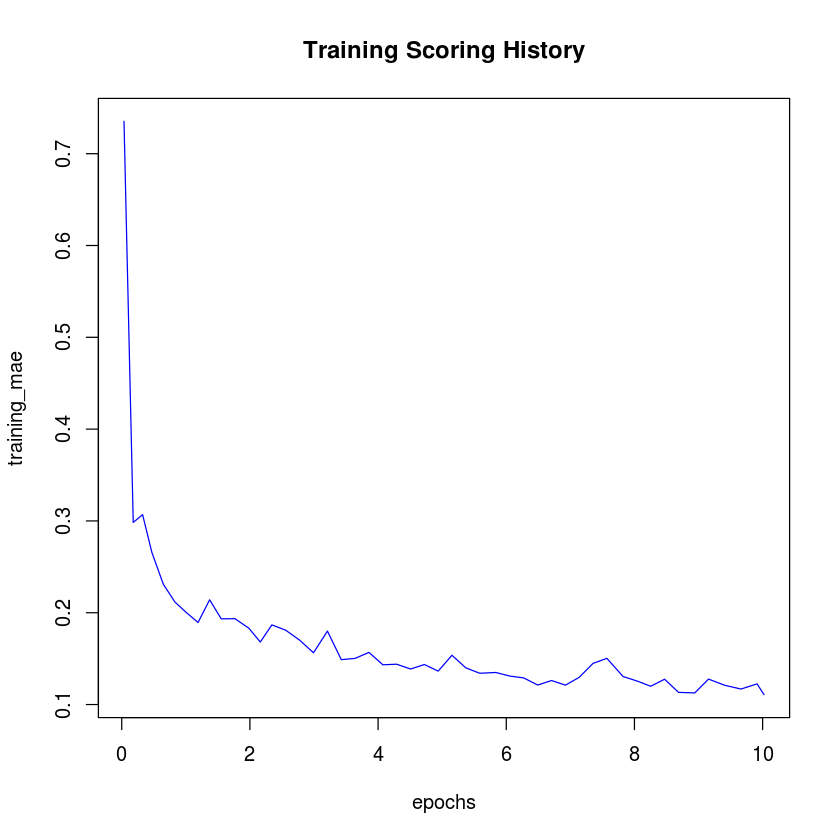

In [25]:
aa=plot(tmodel, metric='mae')
aaa(f)

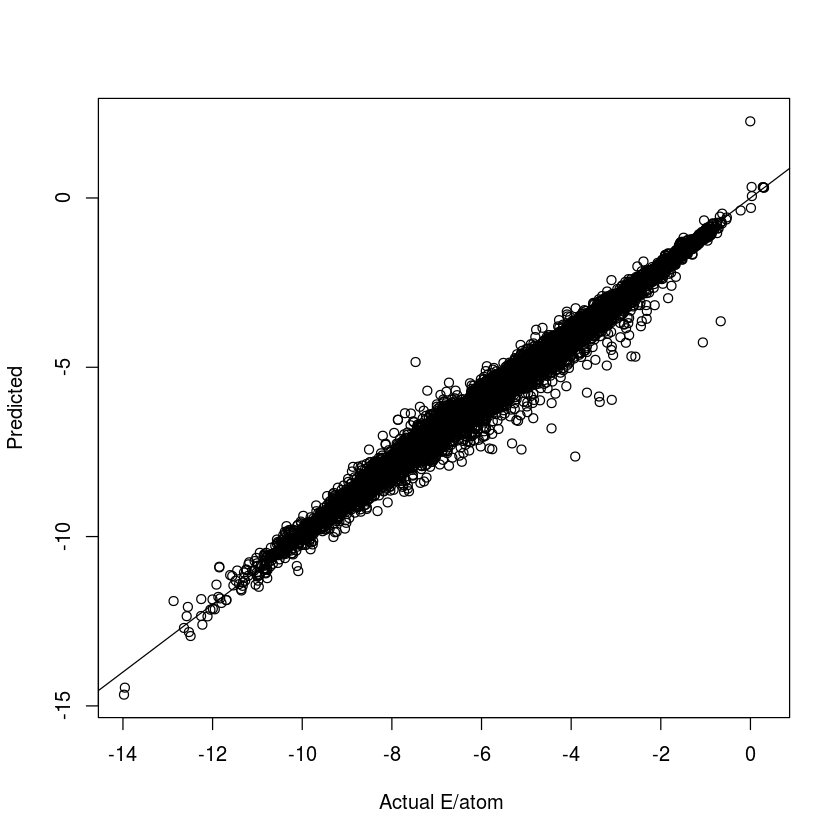

In [26]:
fepa <- as.data.frame(testing_frame[y.dep])
fepa<- as.data.frame(fepa)
forecast_y_t_hat = tpredicted
forecast_y_t_hat <- as.data.frame(forecast_y_t_hat)


names(fepa)[1] <- c("Actual E/atom ")
names(forecast_y_t_hat) <-c("Predicted")

vs <- cbind(fepa, forecast_y_t_hat)

plot(vs)
abline(a=0,b=1)

 전반적으로 모델의 성능이 크게 향상되었다. 하지만 데이터의 양이 증가하면서 학습 및 파라미터 최적화에 더 많은 시간과 자원이 요구된다. 따라서 지금보다 더 복잡한 모델을 다루려면 GPU의 도움이 필수적이라고 볼 수 있다. 다음 예제로는 Tensorflow-GPU와 Keras 패키지를 이용하여 복잡하고 심도있는 학습 네트워크를 구성하는 방법에 대하여 알아본다.
 
 <hr/>
###### References
[1] Saal, J. E., Kirklin, S., Aykol, M., Meredig, B., and Wolverton, C. "Materials Design and Discovery with High-Throughput Density Functional Theory: The Open Quantum Materials Database (OQMD)", JOM 65, 1501-1509 (2013). doi:10.1007/s11837-013-0755-4 [Link](http://dx.doi.org/10.1007/s11837-013-0755-4)

  [2] Kirklin, S., Saal, J.E., Meredig, B., Thompson, A., Doak, J.W., Aykol, M., Rühl, S. and Wolverton, C. "The Open Quantum Materials Database (OQMD): assessing the accuracy of DFT formation energies", npj Computational Materials 1, 15010 (2015). doi:10.1038/npjcompumats.2015.10 [Link](http://dx.doi.org/10.1038/npjcompumats.2015.10)